In [170]:
import pandas as pd

In [171]:
dataset = pd.read_csv("Data-cleaning-for-beginners-using-pandas.csv")
dataset

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,Australia Aus,-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


In [172]:
dataset.drop(columns="Index", inplace=True)

### 1. Missing Values:
Question: Are there any missing values in the dataset, and if so, how should they be handled for each indicator?

In [173]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          22 non-null     float64
 1   Salary       29 non-null     object 
 2   Rating       28 non-null     float64
 3   Location     29 non-null     object 
 4   Established  29 non-null     int64  
 5   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.5+ KB


In [174]:
dataset.isnull().sum()

Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

For _"Age"_ & _"Rating"_ col. we can impute it with mean

In [175]:
#calculating means
age_mean = dataset.Age.mean()
rating_mean = dataset.Rating.mean()

#imputing with means
dataset.Age = dataset.Age.fillna(age_mean)
dataset.Rating = dataset.Rating.fillna(rating_mean)

### 2. Data Types:
Question: What are the data types of each indicator, and do they align with their expected types (e.g., numerical, categorical)?

In [176]:
dataset.dtypes

Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

1. "Index" col. should be treated as categorical ***i.e. object***
2. "Age" col. should be treated as numerical ***i.e int***
3. "Established" col. should be treated as categorical ***i.e. object***
4. "Easy Apply" col. should be treated as <ins>TRUE/FALSE</ins> ***i.e. boolean***

In [177]:
# dataset.Index = dataset["Index"].astype("str")
dataset.Age = dataset["Age"].astype("int64")
dataset.Established = dataset["Established"].astype("object")

#replacing -1 with FALSE in last col.
dataset["Easy Apply"].replace('-1', 0, inplace=True)
dataset["Easy Apply"] = dataset["Easy Apply"].astype("bool")

In [178]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          29 non-null     int64  
 1   Salary       29 non-null     object 
 2   Rating       29 non-null     float64
 3   Location     29 non-null     object 
 4   Established  29 non-null     object 
 5   Easy Apply   29 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 1.3+ KB


### 3. Outliers:
Question: Identify potential outliers in numerical indicators (e.g., Age, Salary, Rating). Should outliers be removed or adjusted?

In [179]:
import numpy as np
import seaborn as sns

<Axes: >

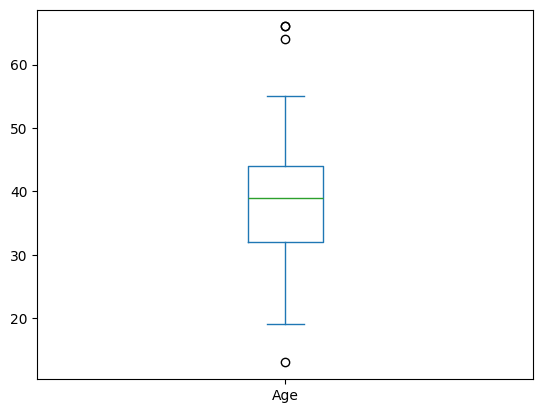

In [180]:
dataset.Age.plot.box()

In [181]:
dataset.Age.describe()

count    29.000000
mean     39.034483
std      13.973145
min      13.000000
25%      32.000000
50%      39.000000
75%      44.000000
max      66.000000
Name: Age, dtype: float64

In [182]:
Q1 = dataset.Age.quantile(.25)
Q3 = dataset.Age.quantile(.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print(lower_bound, upper_bound)

14.0 62.0


In [183]:
dataset.Age[dataset.Age < 14]

24    13
Name: Age, dtype: int64

##### _Treating all outliers above than upper bound i.e. 62_

In [184]:
# Replacing them with upper bound value
dataset.loc[dataset.Age > upper_bound, "Age"] = upper_bound

##### _Treating outliers below than lower bound i.e. 14_

In [185]:
# Replacing them with lower bound value
dataset.loc[dataset.Age < lower_bound, "Age"] = lower_bound

In [186]:
dataset

,Age,Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,5.400000,"India,In",1999,True
1,62,$55k-$66k,3.500000,"New York,Ny",2002,True
2,39,$77k-$89k,-1.000000,"New York,Ny",-1,False
3,62,$44k-$99k,4.400000,India In,1988,False
4,25,$44k-$99k,6.400000,Australia Aus,2002,False
5,44,$77k-$89k,1.400000,"India,In",1999,True
6,21,$44k-$99k,0.000000,"New York,Ny",-1,False
7,44,$44k-$99k,-1.000000,Australia Aus,-1,False
8,35,$44k-$99k,5.400000,"New York,Ny",-1,False
9,22,$44k-$99k,7.700000,"India,In",-1,True


<Axes: >

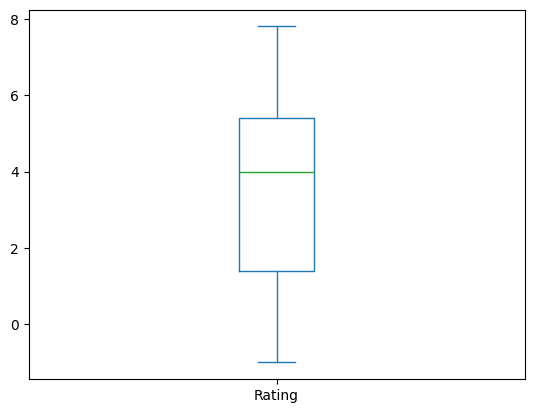

In [187]:
dataset.Rating.plot.box()

##### Handling Negative Ratings

In [188]:
dataset.loc[dataset.Rating < 0, "Rating"] = 0
dataset.Rating = dataset.Rating.round(1)

In [189]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          29 non-null     int64  
 1   Salary       29 non-null     object 
 2   Rating       29 non-null     float64
 3   Location     29 non-null     object 
 4   Established  29 non-null     object 
 5   Easy Apply   29 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 1.3+ KB


<h5>Replacing all invalid years with NaN values

In [190]:
dataset.Established = dataset.Established.apply(lambda x: x if len(str(x)) >= 4 else None)

##### Removing all __NaN__ values

In [191]:
dataset.dropna(inplace=True)

In [192]:
dataset.reset_index(drop=True, inplace=True)
# dataset.Index = dataset.index.values

In [193]:
dataset

,Age,Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,5.4,"India,In",1999.0,True
1,62,$55k-$66k,3.5,"New York,Ny",2002.0,True
2,62,$44k-$99k,4.4,India In,1988.0,False
3,25,$44k-$99k,6.4,Australia Aus,2002.0,False
4,44,$77k-$89k,1.4,"India,In",1999.0,True
5,55,$10k-$49k,5.4,"India,In",2008.0,True
6,44,$10k-$49k,6.7,"India,In",2009.0,False
7,39,$44k-$99k,0.0,"India,In",1999.0,False
8,25,$44k-$99k,0.0,Australia Aus,2019.0,True
9,62,$44k-$99k,4.0,Australia Aus,2020.0,True


## 4. Salary Formatting:
Question: Examine the format of the Salary column. Does it require any formatting or standardization for consistent analysis?

In [194]:
mean_func = lambda x: (int(x[1:3]) + int(x[6:8]))/2 if x != '$88k-$101k' else (int(x[1:3]) + int(x[6:9]))/2

In [195]:
dataset = dataset.assign(Mean_Salary = dataset.Salary.apply(mean_func))
dataset = dataset[['Age','Salary', 'Mean_Salary', 'Rating', 'Location', 'Established', 'Easy Apply']].rename({'Mean_Salary': 'Mean Salary'}, axis='columns')
dataset

,Age,Salary,Mean Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,71.5,5.4,"India,In",1999.0,True
1,62,$55k-$66k,60.5,3.5,"New York,Ny",2002.0,True
2,62,$44k-$99k,71.5,4.4,India In,1988.0,False
3,25,$44k-$99k,71.5,6.4,Australia Aus,2002.0,False
4,44,$77k-$89k,83.0,1.4,"India,In",1999.0,True
5,55,$10k-$49k,29.5,5.4,"India,In",2008.0,True
6,44,$10k-$49k,29.5,6.7,"India,In",2009.0,False
7,39,$44k-$99k,71.5,0.0,"India,In",1999.0,False
8,25,$44k-$99k,71.5,0.0,Australia Aus,2019.0,True
9,62,$44k-$99k,71.5,4.0,Australia Aus,2020.0,True


## 5. Location Standardization:

Question: Check the consistency of location entries. Do they need standardization, and how can this be achieved?



In [196]:
# dataset.Location = dataset.Location.map({'Australia Aus': 'Australia, Aus'})

In [197]:
dataset.loc[dataset.Location == 'Australia Aus', 'Location'] = 'Australia,Aus'
dataset.loc[dataset.Location == 'India In', 'Location'] = 'India,In'

In [198]:
dataset

,Age,Salary,Mean Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,71.5,5.4,"India,In",1999.0,True
1,62,$55k-$66k,60.5,3.5,"New York,Ny",2002.0,True
2,62,$44k-$99k,71.5,4.4,"India,In",1988.0,False
3,25,$44k-$99k,71.5,6.4,"Australia,Aus",2002.0,False
4,44,$77k-$89k,83.0,1.4,"India,In",1999.0,True
5,55,$10k-$49k,29.5,5.4,"India,In",2008.0,True
6,44,$10k-$49k,29.5,6.7,"India,In",2009.0,False
7,39,$44k-$99k,71.5,0.0,"India,In",1999.0,False
8,25,$44k-$99k,71.5,0.0,"Australia,Aus",2019.0,True
9,62,$44k-$99k,71.5,4.0,"Australia,Aus",2020.0,True


## 6. Established Column:
Question: Explore the Established column. Are there any inconsistencies or anomalies that need to be addressed?

This col. already taken into account

In [199]:
dataset.Established = dataset.Established.astype('int')
dataset.Established

0     1999
1     2002
2     1988
3     2002
4     1999
5     2008
6     2009
7     1999
8     2019
9     2020
10    1999
11    1984
12    1943
13    1954
14    1955
15    1944
16    1946
17    1988
18    1999
19    1987
20    1980
21    1934
22    1935
23    1932
Name: Established, dtype: int32

## 7. Easy Apply Indicator:

Question: Analyze the Easy Apply column. Does it contain boolean values or need transformation for better analysis?

Already transformed

In [200]:
dataset['Easy Apply']

0      True
1      True
2     False
3     False
4      True
5      True
6     False
7     False
8      True
9      True
10    False
11    False
12     True
13     True
14     True
15     True
16    False
17     True
18     True
19    False
20     True
21     True
22    False
23    False
Name: Easy Apply, dtype: bool

## 8. Rating Range:

Question: Investigate the range of values in the Rating column. Does it fall within expected rating scales, and how should outliers be treated?

Already treated

In [201]:
dataset.Rating

0     5.4
1     3.5
2     4.4
3     6.4
4     1.4
5     5.4
6     6.7
7     0.0
8     0.0
9     4.0
10    3.0
11    4.5
12    5.3
13    6.7
14    3.3
15    5.7
16    5.0
17    7.8
18    2.4
19    0.0
20    0.0
21    3.5
22    5.4
23    3.4
Name: Rating, dtype: float64


## 9. Age Distribution:

Question: Check the distribution of values in the Age column. Are there any unusual entries, and how might they impact analysis?

Already treated

In [202]:
dataset.Age

0     44
1     62
2     62
3     25
4     44
5     55
6     44
7     39
8     25
9     62
10    44
11    19
12    39
13    35
14    32
15    39
16    35
17    19
18    39
19    14
20    55
21    39
22    52
23    39
Name: Age, dtype: int64

## 10. Handling Special Characters:

Question: Examine all text-based columns (e.g., Location). Are there special characters or inconsistencies that need cleaning?

Already treated

In [203]:
dataset.Location

0          India,In
1       New York,Ny
2          India,In
3     Australia,Aus
4          India,In
5          India,In
6          India,In
7          India,In
8     Australia,Aus
9     Australia,Aus
10    Australia,Aus
11         India,In
12      New York,Ny
13      New York,Ny
14      New York,Ny
15      New York,Ny
16      New York,Ny
17      New York,Ny
18      New York,Ny
19      New York,Ny
20    Australia,Aus
21         India,In
22         India,In
23    Australia,Aus
Name: Location, dtype: object

## 11. Data Integrity:

Question: Ensure data integrity by cross-referencing entries. For instance, does the Established column align with the Age column?

Everything looks fine

In [204]:
dataset

,Age,Salary,Mean Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,71.5,5.4,"India,In",1999,True
1,62,$55k-$66k,60.5,3.5,"New York,Ny",2002,True
2,62,$44k-$99k,71.5,4.4,"India,In",1988,False
3,25,$44k-$99k,71.5,6.4,"Australia,Aus",2002,False
4,44,$77k-$89k,83.0,1.4,"India,In",1999,True
5,55,$10k-$49k,29.5,5.4,"India,In",2008,True
6,44,$10k-$49k,29.5,6.7,"India,In",2009,False
7,39,$44k-$99k,71.5,0.0,"India,In",1999,False
8,25,$44k-$99k,71.5,0.0,"Australia,Aus",2019,True
9,62,$44k-$99k,71.5,4.0,"Australia,Aus",2020,True


## 12. Easy Apply Transformation:

Question: If the Easy Apply column contains non-boolean values, how can it be transformed into a usable format?

Already treated

In [205]:
dataset['Easy Apply']

0      True
1      True
2     False
3     False
4      True
5      True
6     False
7     False
8      True
9      True
10    False
11    False
12     True
13     True
14     True
15     True
16    False
17     True
18     True
19    False
20     True
21     True
22    False
23    False
Name: Easy Apply, dtype: bool

## 13. Location Accuracy:

Question: Assess the accuracy of location entries. Are there misspelled or ambiguous locations that require correction?

Already treated

In [206]:
dataset.Location

0          India,In
1       New York,Ny
2          India,In
3     Australia,Aus
4          India,In
5          India,In
6          India,In
7          India,In
8     Australia,Aus
9     Australia,Aus
10    Australia,Aus
11         India,In
12      New York,Ny
13      New York,Ny
14      New York,Ny
15      New York,Ny
16      New York,Ny
17      New York,Ny
18      New York,Ny
19      New York,Ny
20    Australia,Aus
21         India,In
22         India,In
23    Australia,Aus
Name: Location, dtype: object

## 14. Handling Categorical Data:

Question: For categorical indicators, consider encoding or transforming them into a format suitable for analysis.

Everything looks fine

In [207]:
dataset

,Age,Salary,Mean Salary,Rating,Location,Established,Easy Apply
0,44,$44k-$99k,71.5,5.4,"India,In",1999,True
1,62,$55k-$66k,60.5,3.5,"New York,Ny",2002,True
2,62,$44k-$99k,71.5,4.4,"India,In",1988,False
3,25,$44k-$99k,71.5,6.4,"Australia,Aus",2002,False
4,44,$77k-$89k,83.0,1.4,"India,In",1999,True
5,55,$10k-$49k,29.5,5.4,"India,In",2008,True
6,44,$10k-$49k,29.5,6.7,"India,In",2009,False
7,39,$44k-$99k,71.5,0.0,"India,In",1999,False
8,25,$44k-$99k,71.5,0.0,"Australia,Aus",2019,True
9,62,$44k-$99k,71.5,4.0,"Australia,Aus",2020,True


## 15. Consistent Rating Scale:

Question: Ensure a consistent rating scale in the Rating column. Should it be normalized or adjusted for uniform analysis?

Everything looks good

In [208]:
dataset.Rating

0     5.4
1     3.5
2     4.4
3     6.4
4     1.4
5     5.4
6     6.7
7     0.0
8     0.0
9     4.0
10    3.0
11    4.5
12    5.3
13    6.7
14    3.3
15    5.7
16    5.0
17    7.8
18    2.4
19    0.0
20    0.0
21    3.5
22    5.4
23    3.4
Name: Rating, dtype: float64

---
# END OF PROJECT